In [92]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1'

ML is a game of two parts:

1. Turn your data into numbers presentation

2. Pick or build a model to learn the presentation as best as possible

In [93]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # n_samples × n_features
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Split the dataset into three parts:

1. Training set(the model learns from, 60%-80%)

2. Validation set(the model gets tuned on, 10-20%)

3. Testing set(the model gets evaluated on and tested what it has learned, 10-20%)

To get an indication of how well it generalizes to unseen examples.

In [94]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize: 

Machines love numbers and we humans like to look at things

In [95]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7)) # the size of canvas
    plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")
    plt.scatter(test_data, test_label, c = "r", s = 4, label = "Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "g", s = 4, label = "Predictions")
    plt.legend(prop = {"size": 14})

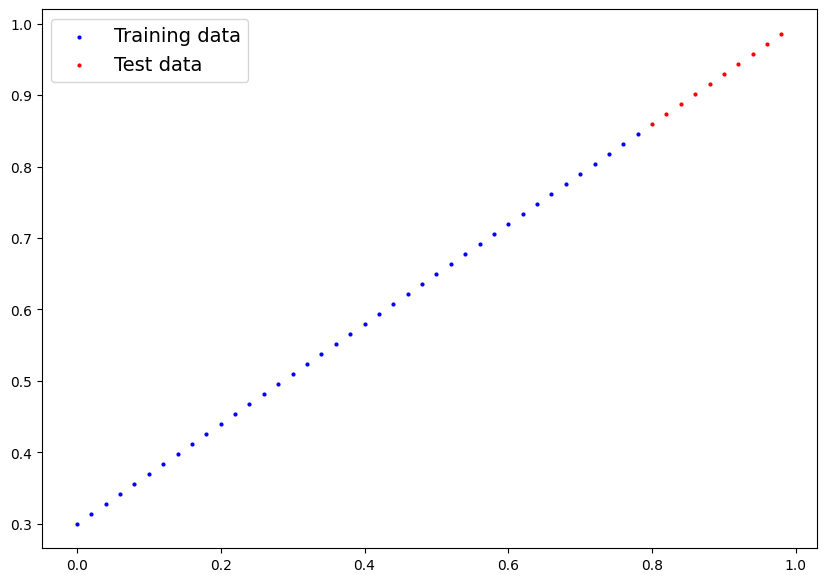

In [96]:
plot_predictions()

## Build model

Replicate a standard lineart regression model using pure PyTorch

In [97]:
class LinearRegressionModel(nn.Module): # nn.Module contains all the building blocks for neural network
    def __init__(self):
        super().__init__()
        # nn.Parameter: A special Tensor type for trainable parameters in PyTorch
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        # torch.randn(1, dtype=torch.float): Generate initial value from standard normal distribution (mean=0, std=1)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor: # need to be override, defines forward computation
        return self.weights * x + self.bias # torch.Tensor defaults to generating 32-bit floating-point tensors

In [98]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [99]:
model_0.state_dict() # get what the model contains

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [100]:
with torch.inference_mode(): # torch.no_grad() is the older version
    y_preds = model_0(X_test)

In [101]:
print(len(X_test))
print(len(y_preds))
print(y_preds)

10
10
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


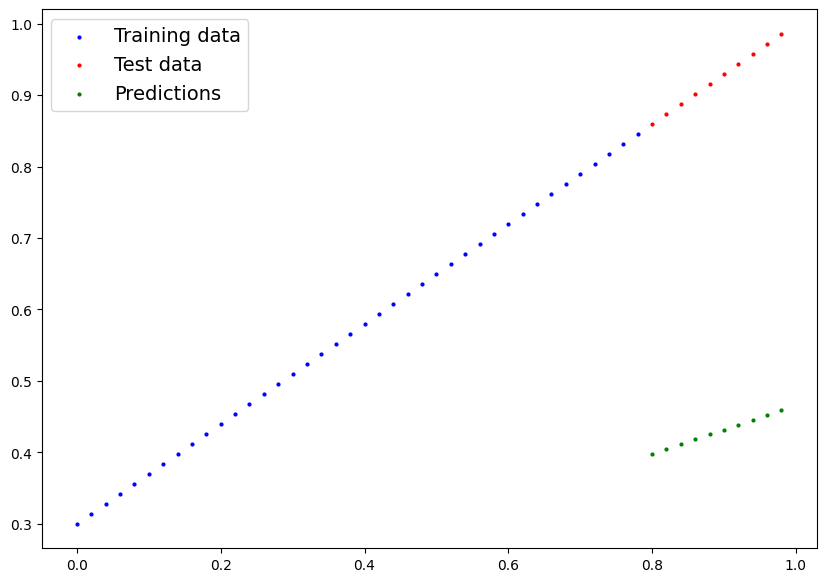

In [102]:
plot_predictions(predictions=y_preds)

In [103]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [104]:
loss_fn = nn.L1Loss() # MAE loss is named as L1Loss(mesure the absolute difference between predictions and labels then takes the mean)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # how to update the internal parameters
# learning rate decides how large the updating step is

# PyTorch training loop

![PyTorch training loop](assets/images/01-pytorch-training-loop-annotated.png)

# PyTorch testing loop

![PyTorch testing loop](assets/images/01-pytorch-testing-loop-annotated.png)

In [105]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # training
    model_0.train()
    y_pred = model_0(X_train)
    train_loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # convert to same data type
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch:{epoch} | MAE train loss:{train_loss} | MAE test loss:{test_loss}")

Epoch:0 | MAE train loss:0.31288138031959534 | MAE test loss:0.48106518387794495
Epoch:10 | MAE train loss:0.1976713240146637 | MAE test loss:0.3463551998138428
Epoch:20 | MAE train loss:0.08908725529909134 | MAE test loss:0.21729660034179688
Epoch:30 | MAE train loss:0.053148526698350906 | MAE test loss:0.14464017748832703
Epoch:40 | MAE train loss:0.04543796554207802 | MAE test loss:0.11360953003168106
Epoch:50 | MAE train loss:0.04167863354086876 | MAE test loss:0.09919948130846024
Epoch:60 | MAE train loss:0.03818932920694351 | MAE test loss:0.08886633068323135
Epoch:70 | MAE train loss:0.03476089984178543 | MAE test loss:0.0805937647819519
Epoch:80 | MAE train loss:0.03132382780313492 | MAE test loss:0.07232122868299484
Epoch:90 | MAE train loss:0.02788740023970604 | MAE test loss:0.06473556160926819


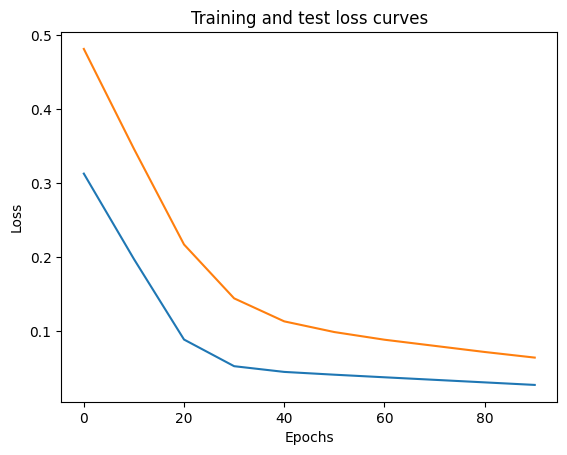

In [106]:
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [107]:
print("The model's weights and bias:")
print(model_0.state_dict())
print("The original weights and bias:")
print(f"weight:{weight}, bias:{bias}")

The model's weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
The original weights and bias:
weight:0.7, bias:0.3


In [108]:
torch.manual_seed(42)

epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # training
    model_0.train()
    y_pred = model_0(X_train)
    train_loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # convert to same data type
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch:{epoch} | MAE train loss:{train_loss} | MAE test loss:{test_loss}")

Epoch:0 | MAE train loss:0.024458957836031914 | MAE test loss:0.05646304413676262
Epoch:10 | MAE train loss:0.021020209416747093 | MAE test loss:0.04819049686193466
Epoch:20 | MAE train loss:0.01758546754717827 | MAE test loss:0.04060482233762741
Epoch:30 | MAE train loss:0.014155392535030842 | MAE test loss:0.03233227878808975
Epoch:40 | MAE train loss:0.010716588236391544 | MAE test loss:0.024059748277068138
Epoch:50 | MAE train loss:0.0072835348546504974 | MAE test loss:0.016474086791276932
Epoch:60 | MAE train loss:0.003851778106763959 | MAE test loss:0.008201557211577892
Epoch:70 | MAE train loss:0.00893248151987791 | MAE test loss:0.005023092031478882
Epoch:80 | MAE train loss:0.00893248151987791 | MAE test loss:0.005023092031478882
Epoch:90 | MAE train loss:0.00893248151987791 | MAE test loss:0.005023092031478882
Epoch:100 | MAE train loss:0.00893248151987791 | MAE test loss:0.005023092031478882
Epoch:110 | MAE train loss:0.00893248151987791 | MAE test loss:0.005023092031478882


In [109]:
print("The model's weights and bias:")
print(model_0.state_dict()) # more close to original settings
print("The original weights and bias:")
print(f"weight:{weight}, bias:{bias}")

The model's weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
The original weights and bias:
weight:0.7, bias:0.3


In [110]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

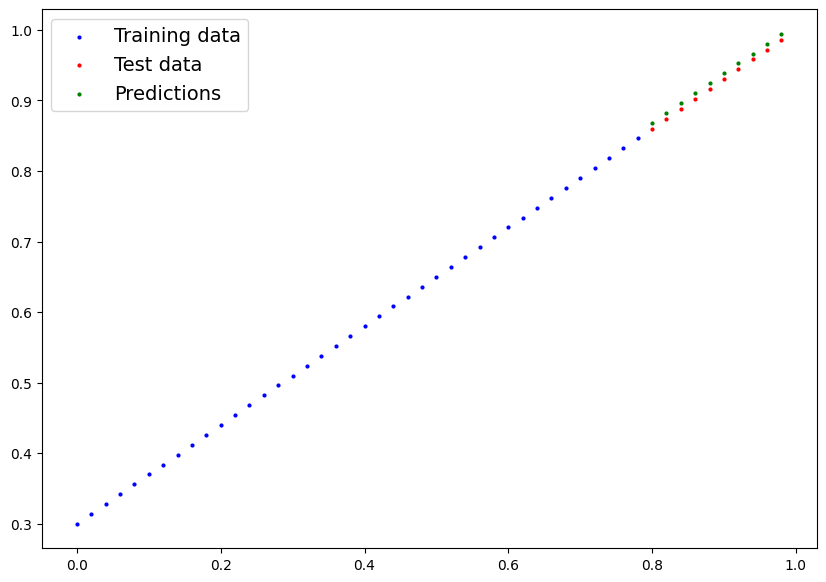

In [111]:
plot_predictions(predictions=y_preds)

# Saving and loading a PyTorch model

In [112]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # create subdirectory

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), # only saves learned parameters
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [113]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--@ 1 meuky  staff  1680 Dec 19 15:55 models/01_pytorch_workflow_model_0.pth


We save only the newly learned parameters instead of the entire model, due to the following drawbacks:
- Saving the full model ties it to specific code structures, runtime environments, and even Python versions.
- This can cause the code to fail in multiple ways when reused in other projects or after code refactoring.
- So instead, we tend to use the flexible method of saving and loading just the model parameters.

In [114]:
load_model_0 = LinearRegressionModel() # a new instance of model
load_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH)) # pass the state_dict() to the new instance

<All keys matched successfully>

In [115]:
load_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = load_model_0(X_test)

In [116]:
y_preds == loaded_model_preds # the predictions of newly loaded model are exactly same with the previous model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [117]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1'

In [118]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [119]:
weight = 0.7
bias = 0.3

x = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # expand a dimension -> num of samples * num of features
y = weight * x + bias
x.shape

torch.Size([50, 1])

In [120]:
train_len = int(0.8 * len(x))
x_train, y_train = x[:train_len], y[:train_len]
x_test, y_test = x[train_len:], y[train_len:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

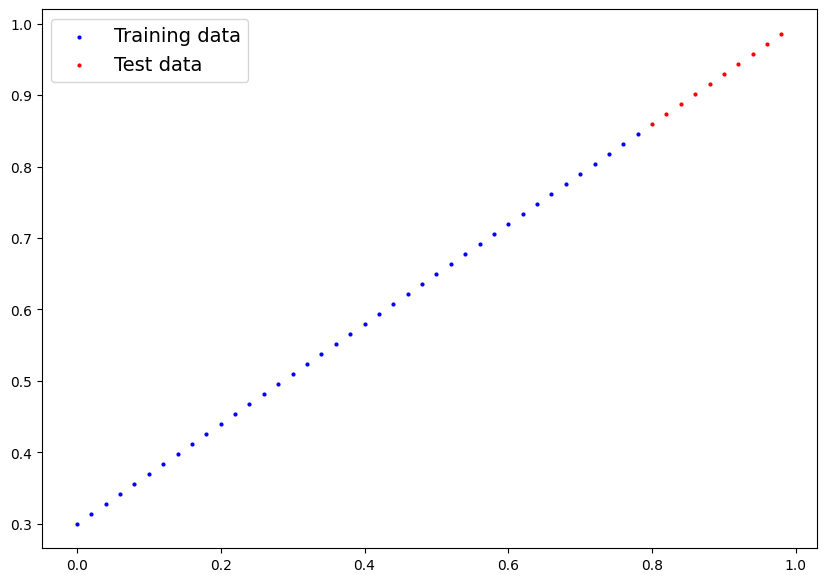

In [121]:
plot_predictions(x_train, y_train, x_test, y_test)

Instead of defining the w&b parameters manually, we'll use nn.Linear(in_features, out_features)

Note: Every sample only has one feature.

![](assets/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)

In [122]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor):
        return self.linear_layer(x)

In [123]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [124]:
next(model_1.parameters()).device # check the model's current device

device(type='cpu')

In [125]:
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

In [126]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [127]:
torch.manual_seed(42)

epochs = 1000

x_train = x_train.to(device) # pay attention to the assignment statement
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # training
    model_1.train()
    y_pred = model_1(x_train)
    train_loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad() # clean up the historical gradients
    train_loss.backward() # calculate current gradients based on loss function
    optimizer.step() # upgrade the parameters based on gradients of current epoch

    # testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 100 | Train loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904


In [128]:
print("The model learned weights and bias:")
print(model_1.state_dict())
print("The original values for weights and bias are:")
print(f"weight: {weight}, bias: {bias}")

The model learned weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')), ('linear_layer.bias', tensor([0.3025], device='mps:0'))])
The original values for weights and bias are:
weight: 0.7, bias: 0.3


In [129]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

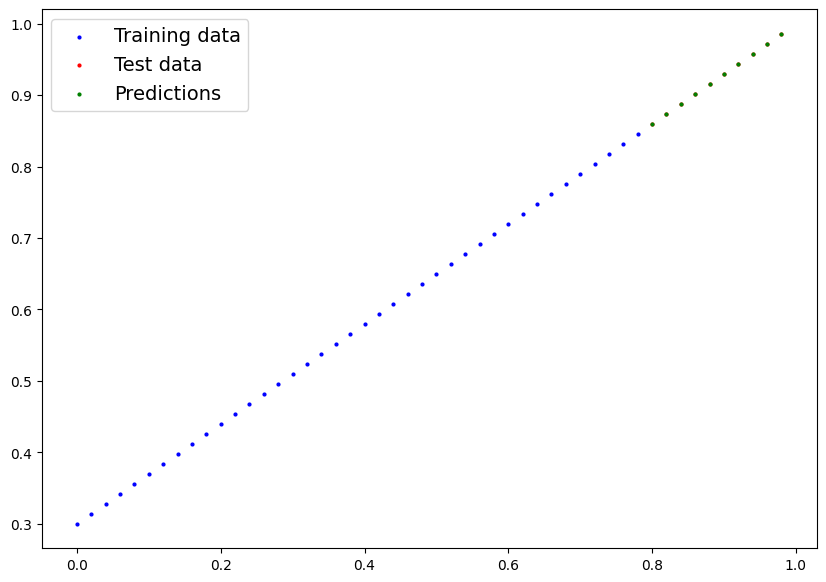

In [ ]:
plot_predictions(predictions=y_preds.cpu()) # put data on cpu and plot

In [132]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [134]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)
print(loaded_model_1)
print(next(loaded_model_1.parameters()).device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
mps:0


In [136]:
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_pres = loaded_model_1(x_test)

y_preds == loaded_model_1_pres

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')